In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [2]:
# read the input files
train = pd.read_csv("house_price_train.csv")
test = pd.read_csv("house_price_test.csv")

In [3]:
# Check the columns in dataframes
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Distribution of Target variables
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

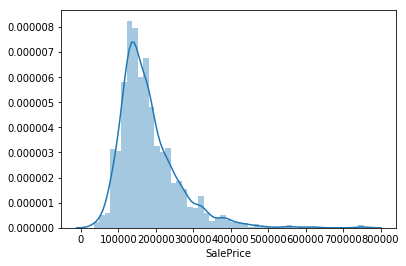

In [5]:
# histogram
sns.distplot(train['SalePrice'])

In [6]:
#Skenewness and Kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurtosis())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
# Transformation: use np.log() totransform trian.SalePrice and Calculate Skewness and Kurtoisis

In [8]:
target = np.log(train.SalePrice)
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurtosis())

Skewness: 0.121335
Kurtosis: 0.809532


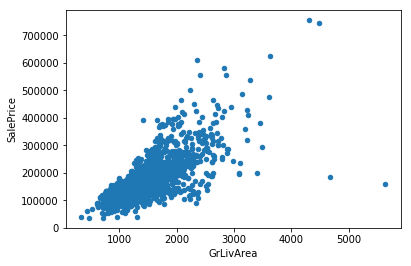

In [9]:
# Relationship with numeric variables
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]],axis =1)
data.plot.scatter(x=var, y = 'SalePrice', ylim = 0.800000)


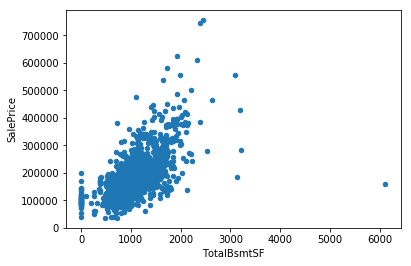

In [10]:
# Relation ship with Numeric Variables
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]],axis =1)
data.plot.scatter(x=var, y = 'SalePrice', ylim = (0.800000))

(-0.5, 9.5, 0, 800000)

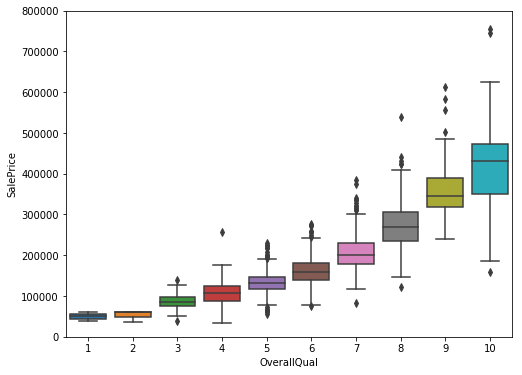

In [11]:
# Relationship with Categorical Features
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin= 0, ymax = 800000)

In [12]:
# Extract numeric Features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
# Calculate Correlation between all Numeric features
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5])
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


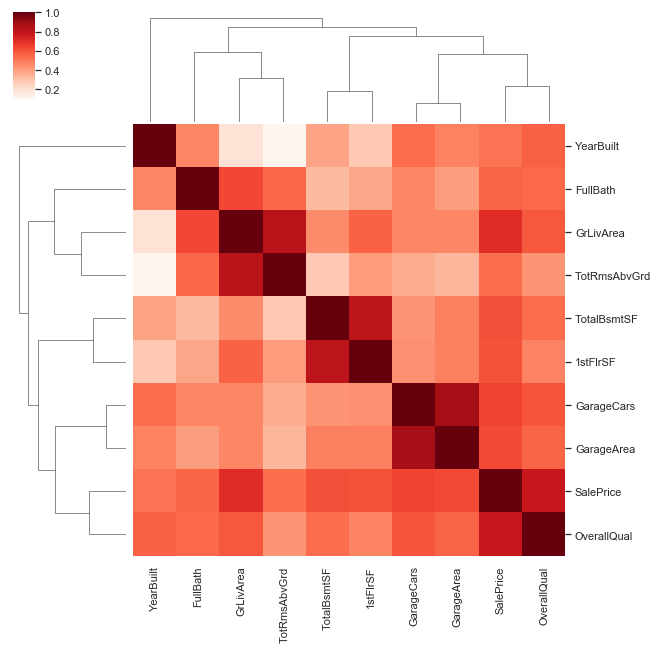

In [14]:
# SalePrice Corr Matrix
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm, cmap = "Reds", cbar = True, square = True, yticklabels = cols.values, xticklabels = cols.values)

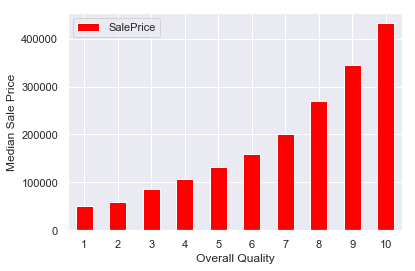

In [15]:
quality_pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc=np.median)
quality_pivot.plot(kind = 'bar', color='red')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

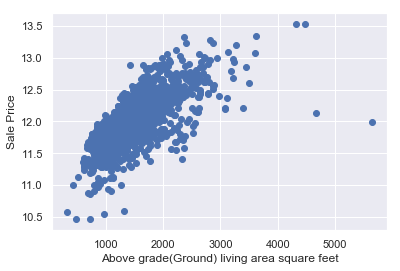

In [16]:
# Analyse Saleprice/GrLivArea
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade(Ground) living area square feet')
plt.show()

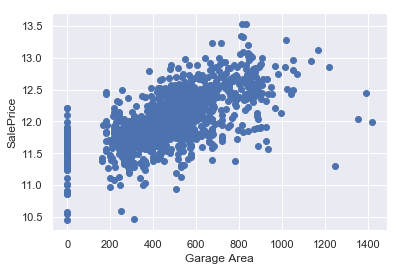

In [17]:
# Analyse SalePrice/Garage Area
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

In [18]:
# Removing outliers wrt Garage area
train = train[train['GarageArea'] < 1200]

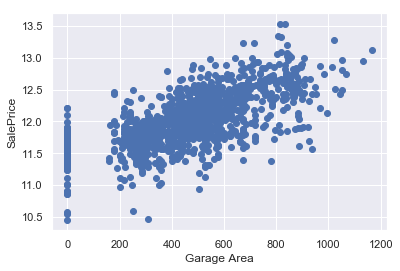

In [20]:
# Scatter plot after removing outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

In [22]:
     #handling null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])

In [23]:
nulls.column = ['Null Count']
nulls.index.name = 'Feature'
nulls

,0
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [24]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [26]:
# extract categorical varaibles
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [27]:
print("Original: \n")
print(train.Street.value_counts())

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [28]:
# apply one hot encoding to transform the street to Boolean
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first = True)

In [30]:
print("Encoded: \n")
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

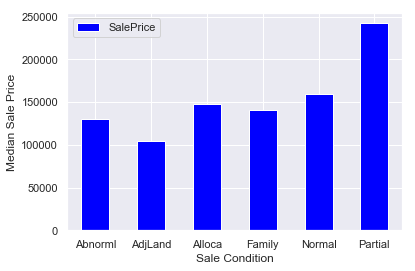

In [31]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [32]:
# Since Partial has Significantly Higher sale price ## apply one hot encoding to covert the Sale condtion to Boolean
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

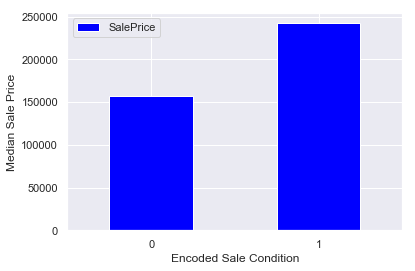

In [33]:
condition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)


In [34]:
# Interpolate missing values with Average
data = train.select_dtypes(include = [np.number]).interpolate().dropna()

In [37]:
sum(data.isnull().sum() != 0)

0

In [39]:
# Build Linear Model using Log transformation
y = np.log(train.SalePrice)
X = data.drop(['SalePrice','Id'],axis = 1)

In [117]:
print(X.shape)
print(data.shape)

(1455, 38)
(1455, 40)


In [40]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state =1 ,test_size = 0.2)

In [42]:
# Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [43]:
# Fit the model
model_lr = lr.fit(X_train, y_train)

In [44]:
# Evaluate the performance and visualize the results
print("R^2 is : \n", model_lr.score(X_test,y_test))

R^2 is : 
 0.8937193471483129


In [45]:
# predictions
y_predictions_lr = model_lr.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
print("RMSE is: \n", mean_squared_error(y_test, y_predictions_lr))

RMSE is: 
 0.015764531969725288


In [50]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean Square error is: ", metrics.mean_squared_error(y_test, y_predictions_lr))
print("Mean absolute error is: ", metrics.mean_absolute_error(y_test, y_predictions_lr))
print("root mean squre error is: ", np.sqrt(metrics.mean_squared_error(y_test,y_predictions_lr)))

Mean Square error is:  0.015764531969725288
Mean absolute error is:  0.08663922071034906
root mean squre error is:  0.12555688738466436


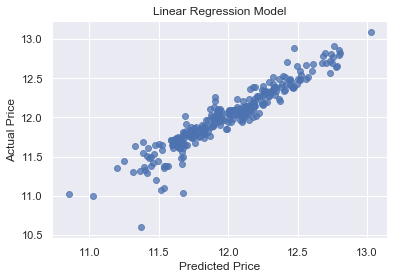

In [52]:
# Visualization
actual_values = y_test
plt.scatter(y_predictions_lr, actual_values, alpha = 0.75, color='b') # alpha helps to show overlapping data
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Linear Regression Model")
plt.show()

Root mean squared error is:  0.1255274518662696


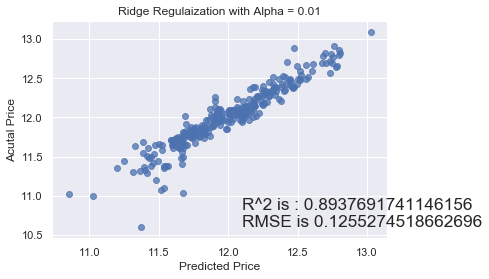

Root mean squared error is:  0.12528497115958032


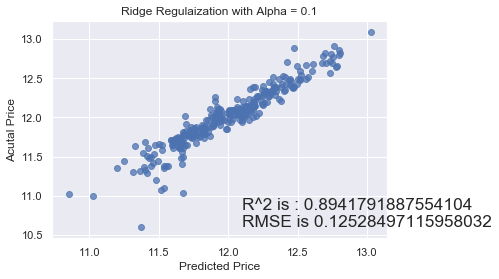

Root mean squared error is:  0.12410895859340043


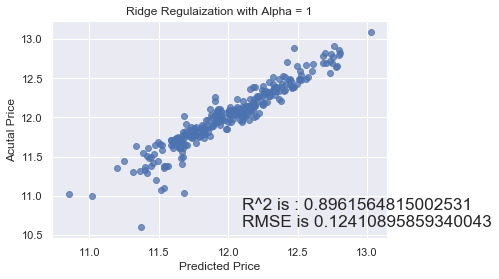

Root mean squared error is:  0.12379839009343403


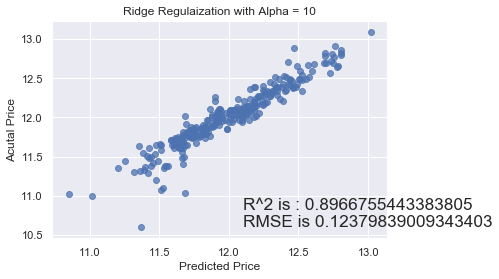

Root mean squared error is:  0.12483889262848495


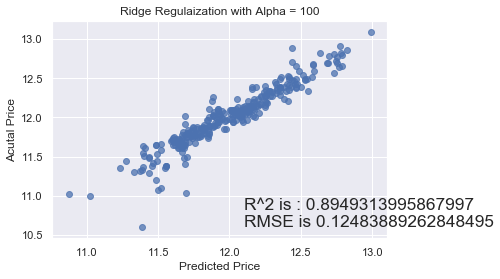

In [57]:
# Model2 using Ridge Regularization
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    print("Root mean squared error is: ", np.sqrt(metrics.mean_squared_error(y_pred_ridge,y_test)))
    plt.scatter(y_pred_ridge, actual_values, alpha=0.75,color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Acutal Price")
    plt.title('Ridge Regulaization with Alpha = {}'.format(alpha))
    overlay = 'R^2 is : {}\nRMSE is {}'.format(
                ridge_model.score(X_test,y_test), 
                 np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [65]:
# Build the Model Using Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# model in use
GBM = GradientBoostingRegressor()
# Use a Grid over parameters of interest
param_grid = {
    "n_estimators" : [50,100,150,200,250],
    "max_depth" : [5, 10],
    "learning_rate" : [0.01,0.05,0.1,0.1,0.2,0.3,0.5,1]
}
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv=10)

In [66]:
%time CV_GBM.fit(X=X_train, y=y_train)

Wall time: 14min 12s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.01, 0.05, 0.1, 0.1, 0.2, 0.3, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
best_gbm_model = CV_GBM.best_estimator_
print(CV_GBM.best_score_, CV_GBM.best_params_)

0.8704178606427584 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [69]:
GBM_f = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=150)

In [70]:
%time GBM_f.fit(X_train, y_train)

Wall time: 443 ms


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
y_pred_GBM = GBM_f.predict(X_test)

In [73]:
#Evaluating the algorithm
from sklearn import metrics
print("Root mean square error: ", np.sqrt(metrics.mean_squared_error(y_pred_GBM,y_test)))
# Evaluate the performance and visulize results
print("R^2 is \n",GBM_f.score(X_test,y_test))

Root mean square error:  0.12255967103162474
R^2 is 
 0.8987329158889003


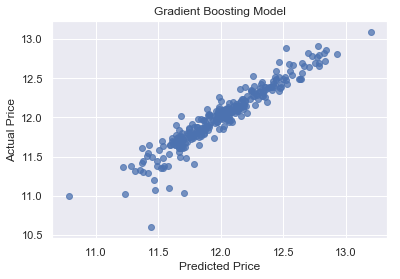

In [74]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_GBM, actual_values, alpha =0.75, color='b')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Gradient Boosting Model")
plt.show()

In [84]:
# Random Forest Algorithm
# Training the algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
param_grid = {
     "n_estimators"      : [10,20,30,100,150,200,250],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10)

In [85]:
%time CV_rfr.fit(X_train,y_train)

Wall time: 10min 29s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 4, 8], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
best_gbm_model = CV_GBM.best_estimator_
print (CV_rfr.best_score_, CV_rfr.best_params_)

0.8706183080464593 {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 250}


In [89]:
rfr_f = RandomForestRegressor(max_features = 'log2', bootstrap = 'False', min_samples_split = 2, n_estimators = 250)

In [90]:
%time rfr_f.fit(X_train, y_train)

Wall time: 508 ms


RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
y_pred_rfr = rfr_f.predict(X_test)

In [92]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_rfr,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", rfr_f.score(X_test, y_test))

Root Mean Square error: 0.1365585742291766
R^2 is: 
 0.8742780584008324


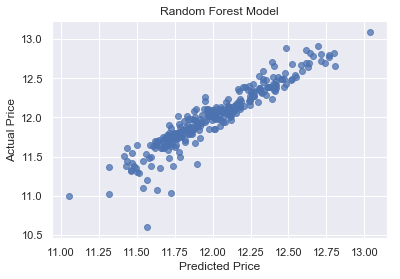

In [93]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_rfr, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')
plt.show()

In [95]:
# XGBoost model
from xgboost import XGBRegressor
xgb = XGBRegressor(nthread=5,max_depth=5,learning_rate=0.07,n_estimators=250)
model_xgb= xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)


In [96]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_xgb,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_xgb.score(X_test, y_test))

Root Mean Square error: 0.12792757901819662
R^2 is: 
 0.8896679991463738


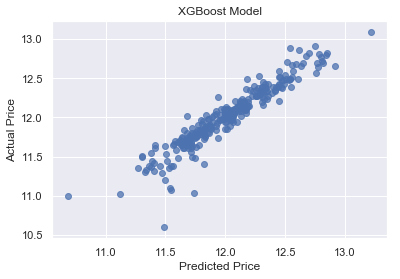

In [97]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_xgb, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')
plt.show()


In [101]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBRegressor()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.01,0.05,0.1, 0.2],
           "n_estimators": [50,100,150,250,300,350]
           }
 
xgb_f = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [102]:
%time xgb_f.fit(X_train, y_train)

Wall time: 1min 41s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nthread': [4, 5], 'max_depth': [5, 10], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [50, 100, 150, 250, 300, 350]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
# Find best model
final_gbm_model = xgb_f.best_estimator_
print (xgb_f.best_score_, xgb_f.best_params_)

0.867188625488965 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 350, 'nthread': 4}


In [104]:
# XGBoost model
from xgboost import XGBRegressor
xgb_final = XGBRegressor(nthread=4,max_depth=5,learning_rate=0.05,n_estimators=350)
model_xgb_final= xgb_final.fit(X_train,y_train)
y_pred_xgb_final = xgb_final.predict(X_test)

In [105]:
# Evaluating the algorithm
from sklearn import metrics
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_xgb_final,y_test)))
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_xgb_final.score(X_test, y_test))

Root Mean Square error: 0.12805030192177613
R^2 is: 
 0.8894562112223237


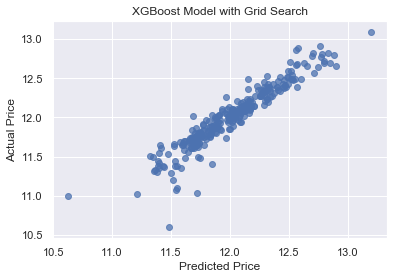

In [106]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_xgb_final, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model with Grid Search')
plt.show()

In [107]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [108]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [109]:
# Select the features from Test data
predictions = GBM_f.predict(feats)

In [110]:
# Transform the Predicitons to correct form
final_predictions = np.exp(predictions)

In [111]:
# Compare Original and Final Predicitons
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.69486052 11.93668777 12.1164892  12.12354817 12.13446145] 

Final predictions are: 
 [119953.62830394 152769.84230424 182862.39416205 184157.78038196
 186178.5518058 ]


In [112]:
## Assign these predictions
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119953.628304
1,1462,152769.842304
2,1463,182862.394162
3,1464,184157.780382
4,1465,186178.551806


In [113]:
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'enc_street',
       'enc_condition'],
      dtype='object')

In [114]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [119]:
print(data.shape, feats.shape)

(1455, 40) (1459, 38)
